# Random Walk on Networks #

In [13]:
version$version.string
library('igraph')
library('Matrix')
library('pracma')

[1] "R version 3.4.4 (2018-03-15)"

In [2]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [3]:
random_walk_teleportation_personalized = function (g, num_steps, start_node, teleportation = 0.0, pr = NULL, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        
        # teleportation
        if (runif(1) < teleportation) {
            if (is.null(pr))
                v = sample(1:vcount(g), 1)
            else
                v = sample(1:vcount(g), 1, prob = pr)
        }
    }
    
    return(v)
}

## 3. PageRank

### Qa: Create a directed random network with 1000 nodes, using the preferential attachment model, where m = 4.

In [4]:
set.seed(0)
g = barabasi.game(1000, 4, directed = T)
is.connected(g)
diameter(g)

[1] TRUE

[1] 2

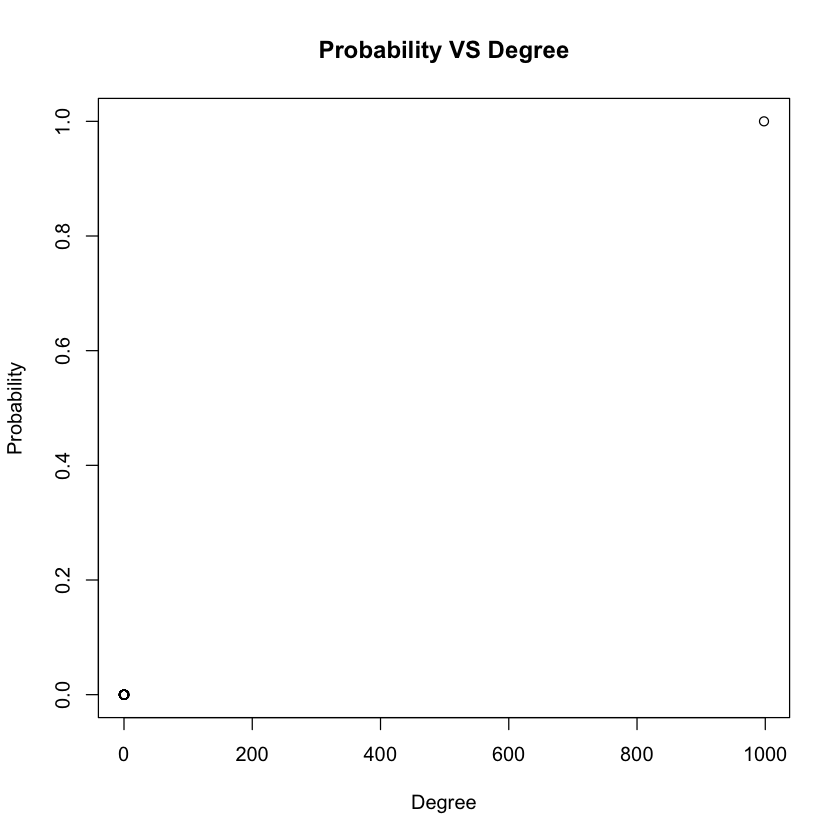

In [5]:
pr_end_1 = rep(0, 1000)
transition_matrix = create_transition_matrix(g)

for (start in 1:1000) {
    end = random_walk_teleportation_personalized(g, 2, start, 0, NULL, transition_matrix)
    pr_end_1[end] = pr_end_1[end] + 1
}
pr_end_1 = pr_end_1 / 1000
# page_rank_old(p1, damping=0.999, niter=1000, eps=0.001)

plot(degree(g, mode = 'in'), pr_end_1, main = 'Probability VS Degree', xlab = 'Degree', ylab = 'Probability')

In [6]:
pr_end_1

[1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0

### Qb: Random walk with teleportation probability of 0.15

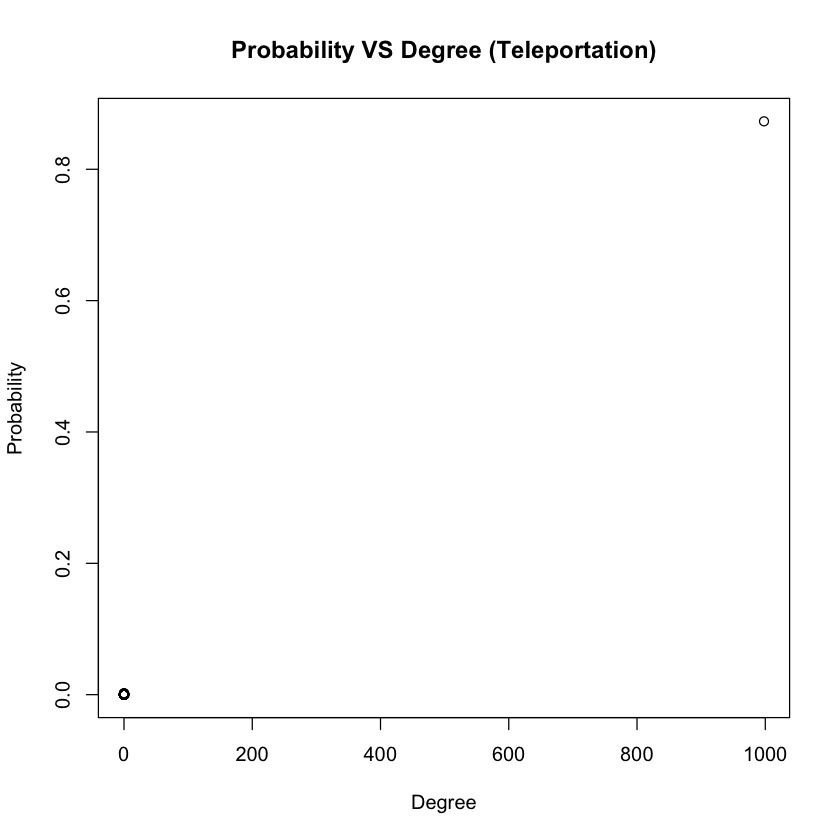

In [7]:
pr_end_2 = rep(0, 1000)

for (start in 1:1000) {
    end = random_walk_teleportation_personalized(g, 2, start, 0.15, NULL, transition_matrix)
    pr_end_2[end] = pr_end_2[end] + 1
}
pr_end_2 = pr_end_2 / 1000

plot(degree(g, mode = 'in'), pr_end_2, main = 'Probability VS Degree (Teleportation)', xlab = 'Degree', ylab = 'Probability')

In [8]:
pr_end_2

[1] 0.873 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.001 0.001 0.000
  [13] 0.000 0.000 0.001 0.000 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000
  [25] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000
  [37] 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [49] 0.000 0.000 0.000 0.001 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.001
  [61] 0.000 0.000 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [73] 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [85] 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [97] 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [109] 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [121] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.001 0.000 0.000 0.000
 [133] 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [145] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.002 0.000
 [157] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [169] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [181] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000
 [193] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000
 [205] 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [217] 0.000 0.000 0.001 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [229] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [241] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001
 [253] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [265] 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [277] 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.001 0.000 0.000 0.000 0.000
 [289] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000
 [301] 0.000 0.000 0.000 0.000 0.000 0.000 0.002 0.000 0.000 0.000 0.000 0.000
 [313] 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000
 [325] 0.001 0.000 0.001 0.000 0.001 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [337] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [349] 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [361] 0.000 0.001 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000
 [373] 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000
 [385] 0.000 0.000 0.001 0.000 0.000 0.000 0.001 0.001 0.000 0.000 0.000 0.000
 [397] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [409] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001
 [421] 0.001 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000
 [433] 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000
 [445] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000
 [457] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000
 [469] 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.001 0.000 0.000 0.000 0.000
 [481] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001
 [493] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [505] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000
 [517] 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [529] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [541] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000
 [553] 0.000 0.000 0.000 0.000 0.001 0.001 0.000 0.000 0.000 0.001 0.001 0.000
 [565] 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [577] 0.000 0.000 0.000 0.001 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [589] 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.001 0.000
 [601] 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.00

## 4. Personalized PageRank

### Qa: Personalized PageRank

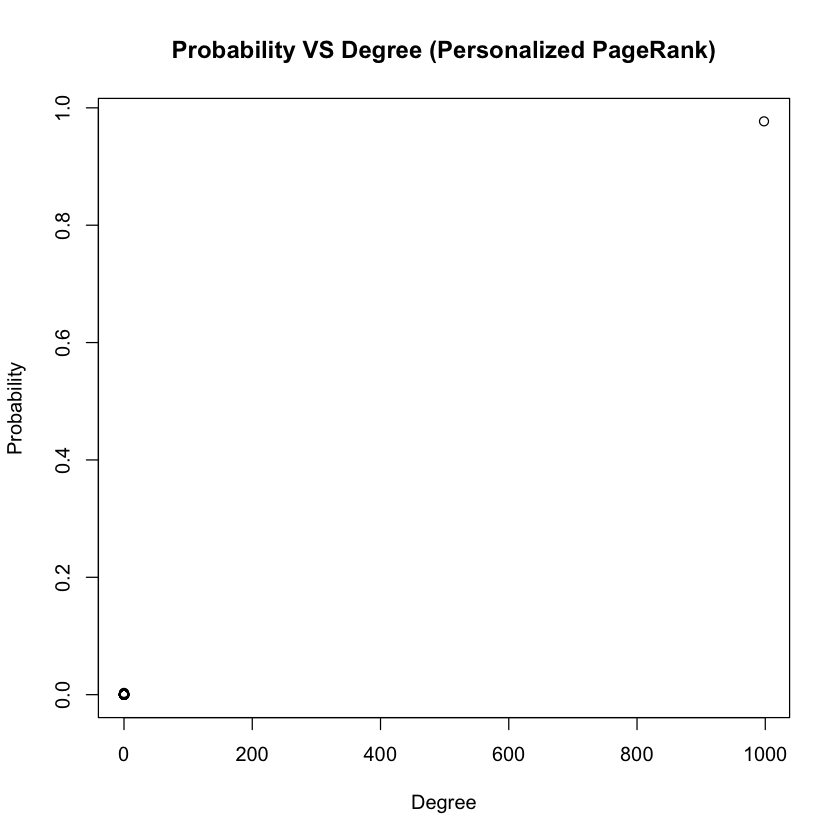

In [9]:
pr_end_3 = rep(0, 1000)

for (start in 1:1000) {
    end = random_walk_teleportation_personalized(g, 2, start, 0.15, pr_end_2, transition_matrix)
    pr_end_3[end] = pr_end_3[end] + 1
}
pr_end_3 = pr_end_3 / 1000

plot(degree(g, mode = 'in'), pr_end_3, main = 'Probability VS Degree (Personalized PageRank)', xlab = 'Degree', ylab = 'Probability')

In [10]:
pr_end_3

[1] 0.977 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.001 0.000 0.000
  [13] 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000
  [25] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000
  [37] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [49] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [61] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [73] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [85] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [97] 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [109] 0.000 0.000 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [121] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000
 [133] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [145] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000
 [157] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [169] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [181] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000
 [193] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [205] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [217] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [229] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [241] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001
 [253] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [265] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [277] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [289] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [301] 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [313] 0.000 0.000 0.000 0.000 0.000 0.002 0.000 0.000 0.000 0.000 0.000 0.000
 [325] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [337] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [349] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [361] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [373] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [385] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [397] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [409] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.002
 [421] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [433] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.003 0.000 0.000
 [445] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [457] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [469] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [481] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [493] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [505] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [517] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [529] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [541] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [553] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [565] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [577] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [589] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [601] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.00

### Teleportation only on two nodes with medium PageRank

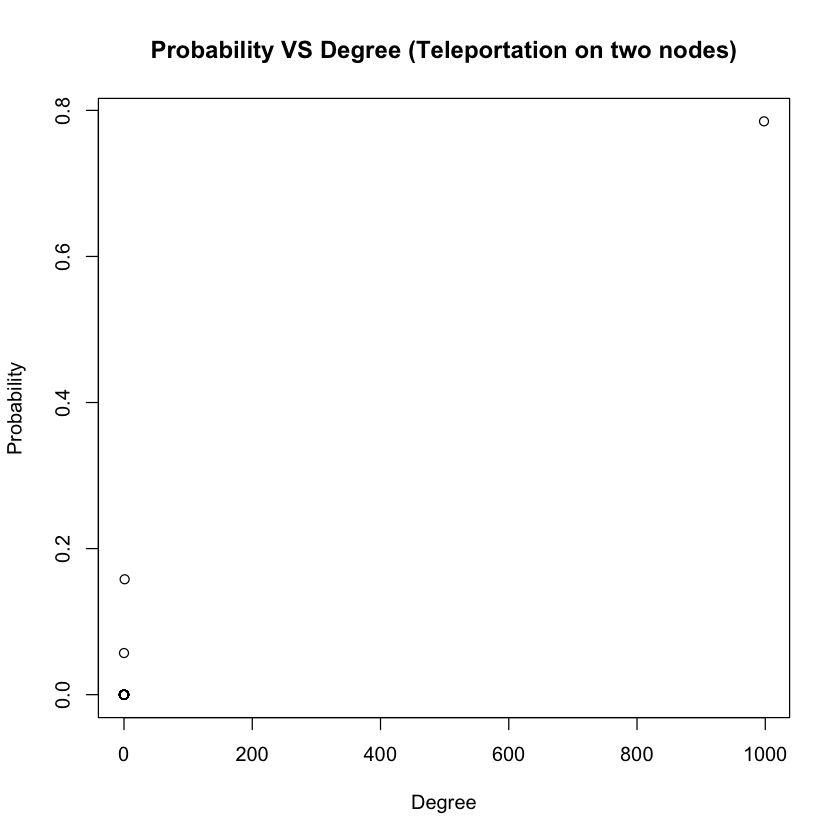

In [11]:
pr = rep(0, 1000)
pr[2] = 0.5
pr[3] = 0.5

pr_end_4 = rep(0, 1000)

for (start in 1:1000) {
    end = random_walk_teleportation_personalized(g, 2, start, 0.15, pr, transition_matrix)
    pr_end_4[end] = pr_end_4[end] + 1
}
pr_end_4 = pr_end_4 / 1000

plot(degree(g, mode = 'in'), pr_end_4, main = 'Probability VS Degree (Teleportation on two nodes)', xlab = 'Degree', ylab = 'Probability')

In [12]:
pr_end_4

[1] 0.785 0.158 0.057 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [13] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [25] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [37] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [49] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [61] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [73] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [85] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [97] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [109] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [121] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [133] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [145] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [157] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [169] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [181] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [193] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [205] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [217] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [229] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [241] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [253] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [265] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [277] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [289] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [301] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [313] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [325] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [337] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [349] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [361] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [373] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [385] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [397] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [409] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [421] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [433] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [445] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [457] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [469] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [481] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [493] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [505] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [517] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [529] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [541] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [553] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [565] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [577] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [589] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [601] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.00

### Qc: Adjust the PageRank function taking into account the effect of self-reinforcement